## BUILDING A SIMPLE NATURAL LANGUAGE PROCESSING, SPAM AND HAM DETECTOR
Natural language processing is a field in machine learning, it is the ability of a computer to understand, analyze,manipulate, and potentionally generate human language.

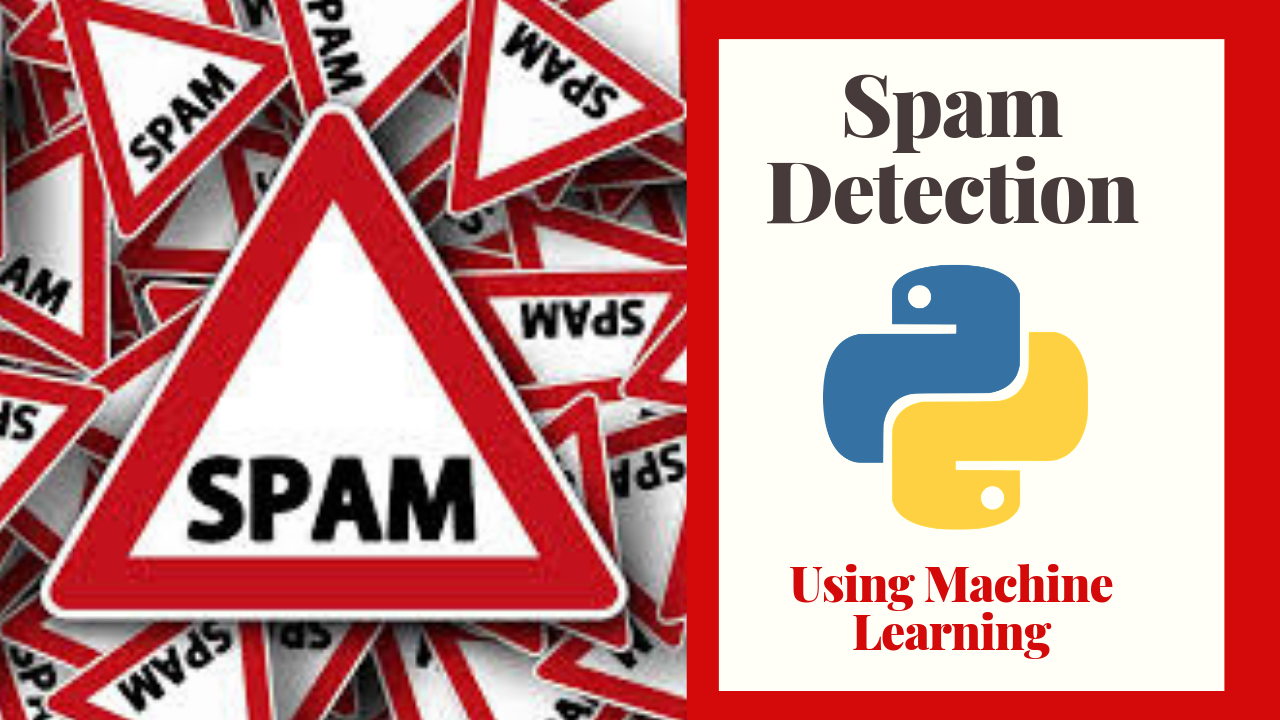

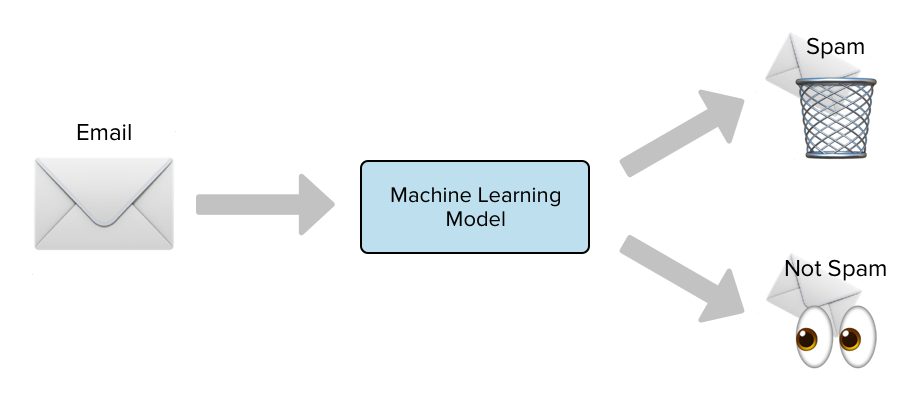

### FIRST STEP IS TO IMPORT LIBARIES

In [22]:
import pandas as pd
import numpy as np


### NEXT WE NEED TO LOAD THE DATASET 

In [23]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


## SELECT THE COLUMNS YOU WANT TO WORK WITH, IN THIS CASE IDENTIFYING THE 'FEATURES'(INDEPENDENT) & 'LABEL'(DEPENDENT)

In [25]:
df = df[['v1','v2']]

### RENAMING THE COLUMNS TO MAKE IT MORE UNDERSTANDABLE AND INTERPRETABLE

In [26]:
df = df.rename(columns={'v1': 'Label', 'v2':'Text'})
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## CHECK FOR DUPLICATES, IF ANY DROP THEM

In [27]:
df[df[['Label', 'Text']].duplicated() == True]
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df= df.drop_duplicates()

### CHECKING TO CONFIRM THAT THE DUPLICATES ARE GONE

In [29]:

df[df[['Label', 'Text']].duplicated() == True]

,Label,Text


### VISUALIZING THE CLEANED DATASET, TO UNDERSTAND IT BETTER

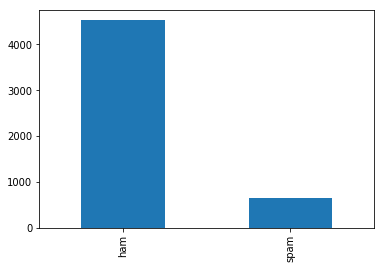

In [30]:
import matplotlib.pyplot as plt
df.Label.value_counts().plot(kind = 'bar')

## NEXT WE TRAIN AND TEST OUR DATASET, IN ORDER TO DO SO, WE HAVE TO IMPORT THE NEEDED LIBARIES 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score

### DEFINING A FUNCTION

In [32]:
def review_message(msg):
    #converting messages to lowercase
    msg = msg.lower()
    return msg

## APPLY THE DEFINED FUNCTION TO THE DATASET

In [33]:
df['Text'] = df ['Text'].apply(review_message)
df.head()

,Label,Text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## TRAINING & TESTING THE DATASET

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df['Text'],df['Label'], test_size = 0.1, random_state=1)

## SUPPORT VECTOR MACHINE MODEL

In [35]:
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)

In [36]:
svm = svm.SVC(C = 1000)
svm.fit(x_train_vec, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## CHECKING THE ACCURACY OF THE MODEL

In [37]:
x_test = vectorizer.transform(x_test)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.9787234042553191

In [38]:
confusion_matrix(y_test, y_pred)

array([[462,   0],
       [ 11,  44]], dtype=int64)

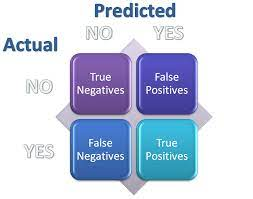

## LOGISTIC REGRESSION MODEL

In [39]:
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)


In [40]:
model = LogisticRegression()
model.fit(x_train_vec, y_train)
pred = model.predict(x_test)
print("This model is "  + str(accuracy_score(y_test,pred)*100) + " percent accurate")

This model is 96.90522243713733 percent accurate


In [42]:
confusion_matrix(y_test,pred)

array([[462,   0],
       [ 16,  39]], dtype=int64)

### CLASSIFICATION REPORT FOR SVM & LOGISTIC REGRESSION

In [43]:
from sklearn.metrics import classification_report
Rep = classification_report(y_test, y_pred)
print(Rep)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       462
        spam       1.00      0.80      0.89        55

   micro avg       0.98      0.98      0.98       517
   macro avg       0.99      0.90      0.94       517
weighted avg       0.98      0.98      0.98       517



In [44]:
Rep = classification_report(y_test, pred)
print(Rep)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       462
        spam       1.00      0.71      0.83        55

   micro avg       0.97      0.97      0.97       517
   macro avg       0.98      0.85      0.91       517
weighted avg       0.97      0.97      0.97       517

